## Logistic regression_Quality





In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


## `1.` Load and Read the dataset

`a.` load the dataset and view headers

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
quality = pd.read_csv('quality.csv')
quality.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


The variables in the dataset quality.csv are as follows:

MemberID is just an identifying number.

InpatientDays is the number of inpatient visits, or number of days the person spent in the hospital.

ERVisits is the number of times the patient visited the emergency room.
OfficeVisits is the number of times the patient visited any doctor's office.
Narcotics is the number of prescriptions the patient had for narcotics.

DaysSinceLastERVisit is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER). 

Pain is the number of visits for which the patient complained about pain.

TotalVisits is the total number of times the patient visited any healthcare provider.

ProviderCount is the number of providers that served the patient.

MedicalClaims is the number of days on which the patient had a medical claim.

ClaimLines is the total number of medical claims.

StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).

AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out.

PoorCare is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

`b.` find the number of rows in the dataset.

In [3]:
# get the total number of rows in the dataframe
n_rows = quality.shape[0]
print('number of rows is :', n_rows)

number of rows is : 131


`c.` The number of unique entries in the year column in the dataset.

In [4]:
# wehn this outcome is compared to the number of entries, can detect dublicated entries in the column
quality.MemberID.nunique()

131

`d.` Describe the dataset

In [5]:
quality.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


`e.` get information on the dataset (dtypes, missing values, value_counts)

In [6]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MemberID              131 non-null    int64  
 1   InpatientDays         131 non-null    int64  
 2   ERVisits              131 non-null    int64  
 3   OfficeVisits          131 non-null    int64  
 4   Narcotics             131 non-null    int64  
 5   DaysSinceLastERVisit  131 non-null    float64
 6   Pain                  131 non-null    int64  
 7   TotalVisits           131 non-null    int64  
 8   ProviderCount         131 non-null    int64  
 9   MedicalClaims         131 non-null    int64  
 10  ClaimLines            131 non-null    int64  
 11  StartedOnCombination  131 non-null    bool   
 12  AcuteDrugGapSmall     131 non-null    int64  
 13  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB


In [7]:
#Sum the number of missing data in the dataset 
quality.isnull().sum().sort_values()

MemberID                0
InpatientDays           0
ERVisits                0
OfficeVisits            0
Narcotics               0
DaysSinceLastERVisit    0
Pain                    0
TotalVisits             0
ProviderCount           0
MedicalClaims           0
ClaimLines              0
StartedOnCombination    0
AcuteDrugGapSmall       0
PoorCare                0
dtype: int64

In [8]:
# calculate the value counts of the label
quality.PoorCare.value_counts()

# in this work, 0 means good care and 1 means poor care

0    98
1    33
Name: PoorCare, dtype: int64

In [9]:
## if we consider a model that predicts all patients recieving a good care 
## what is the accuracy of the model?
print( 'the accuracy of a model predict good care all the time is :',98/131)

the accuracy of a model predict good care all the time is : 0.7480916030534351


`f.` convert a varibale datatype 

In [10]:
quality["StartedOnCombination"] = quality["StartedOnCombination"].astype(int)

## `2.` Prepare the dataset for the model 

`2.a` Split the data

In [11]:
## use numpy to split the data into training, testing and validation
## BAKE: the code is not debugable 

np.random.seed(88)
perm = np.random.permutation(quality.index)
m = len(quality.index)
train_end = int(0.75 * m) # training 60%
train = quality.iloc[perm[:train_end]]
test = quality.iloc[perm[train_end:]] # testing 30%

In [12]:
# confirm the splited dataframes
print('train dataset')
print(train.shape)
print("test data set")
print(test.shape)

train dataset
(98, 14)
test data set
(33, 14)


## `3.` Correaltion

In [13]:
train.columns

Index(['MemberID', 'InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

**Pairplots**

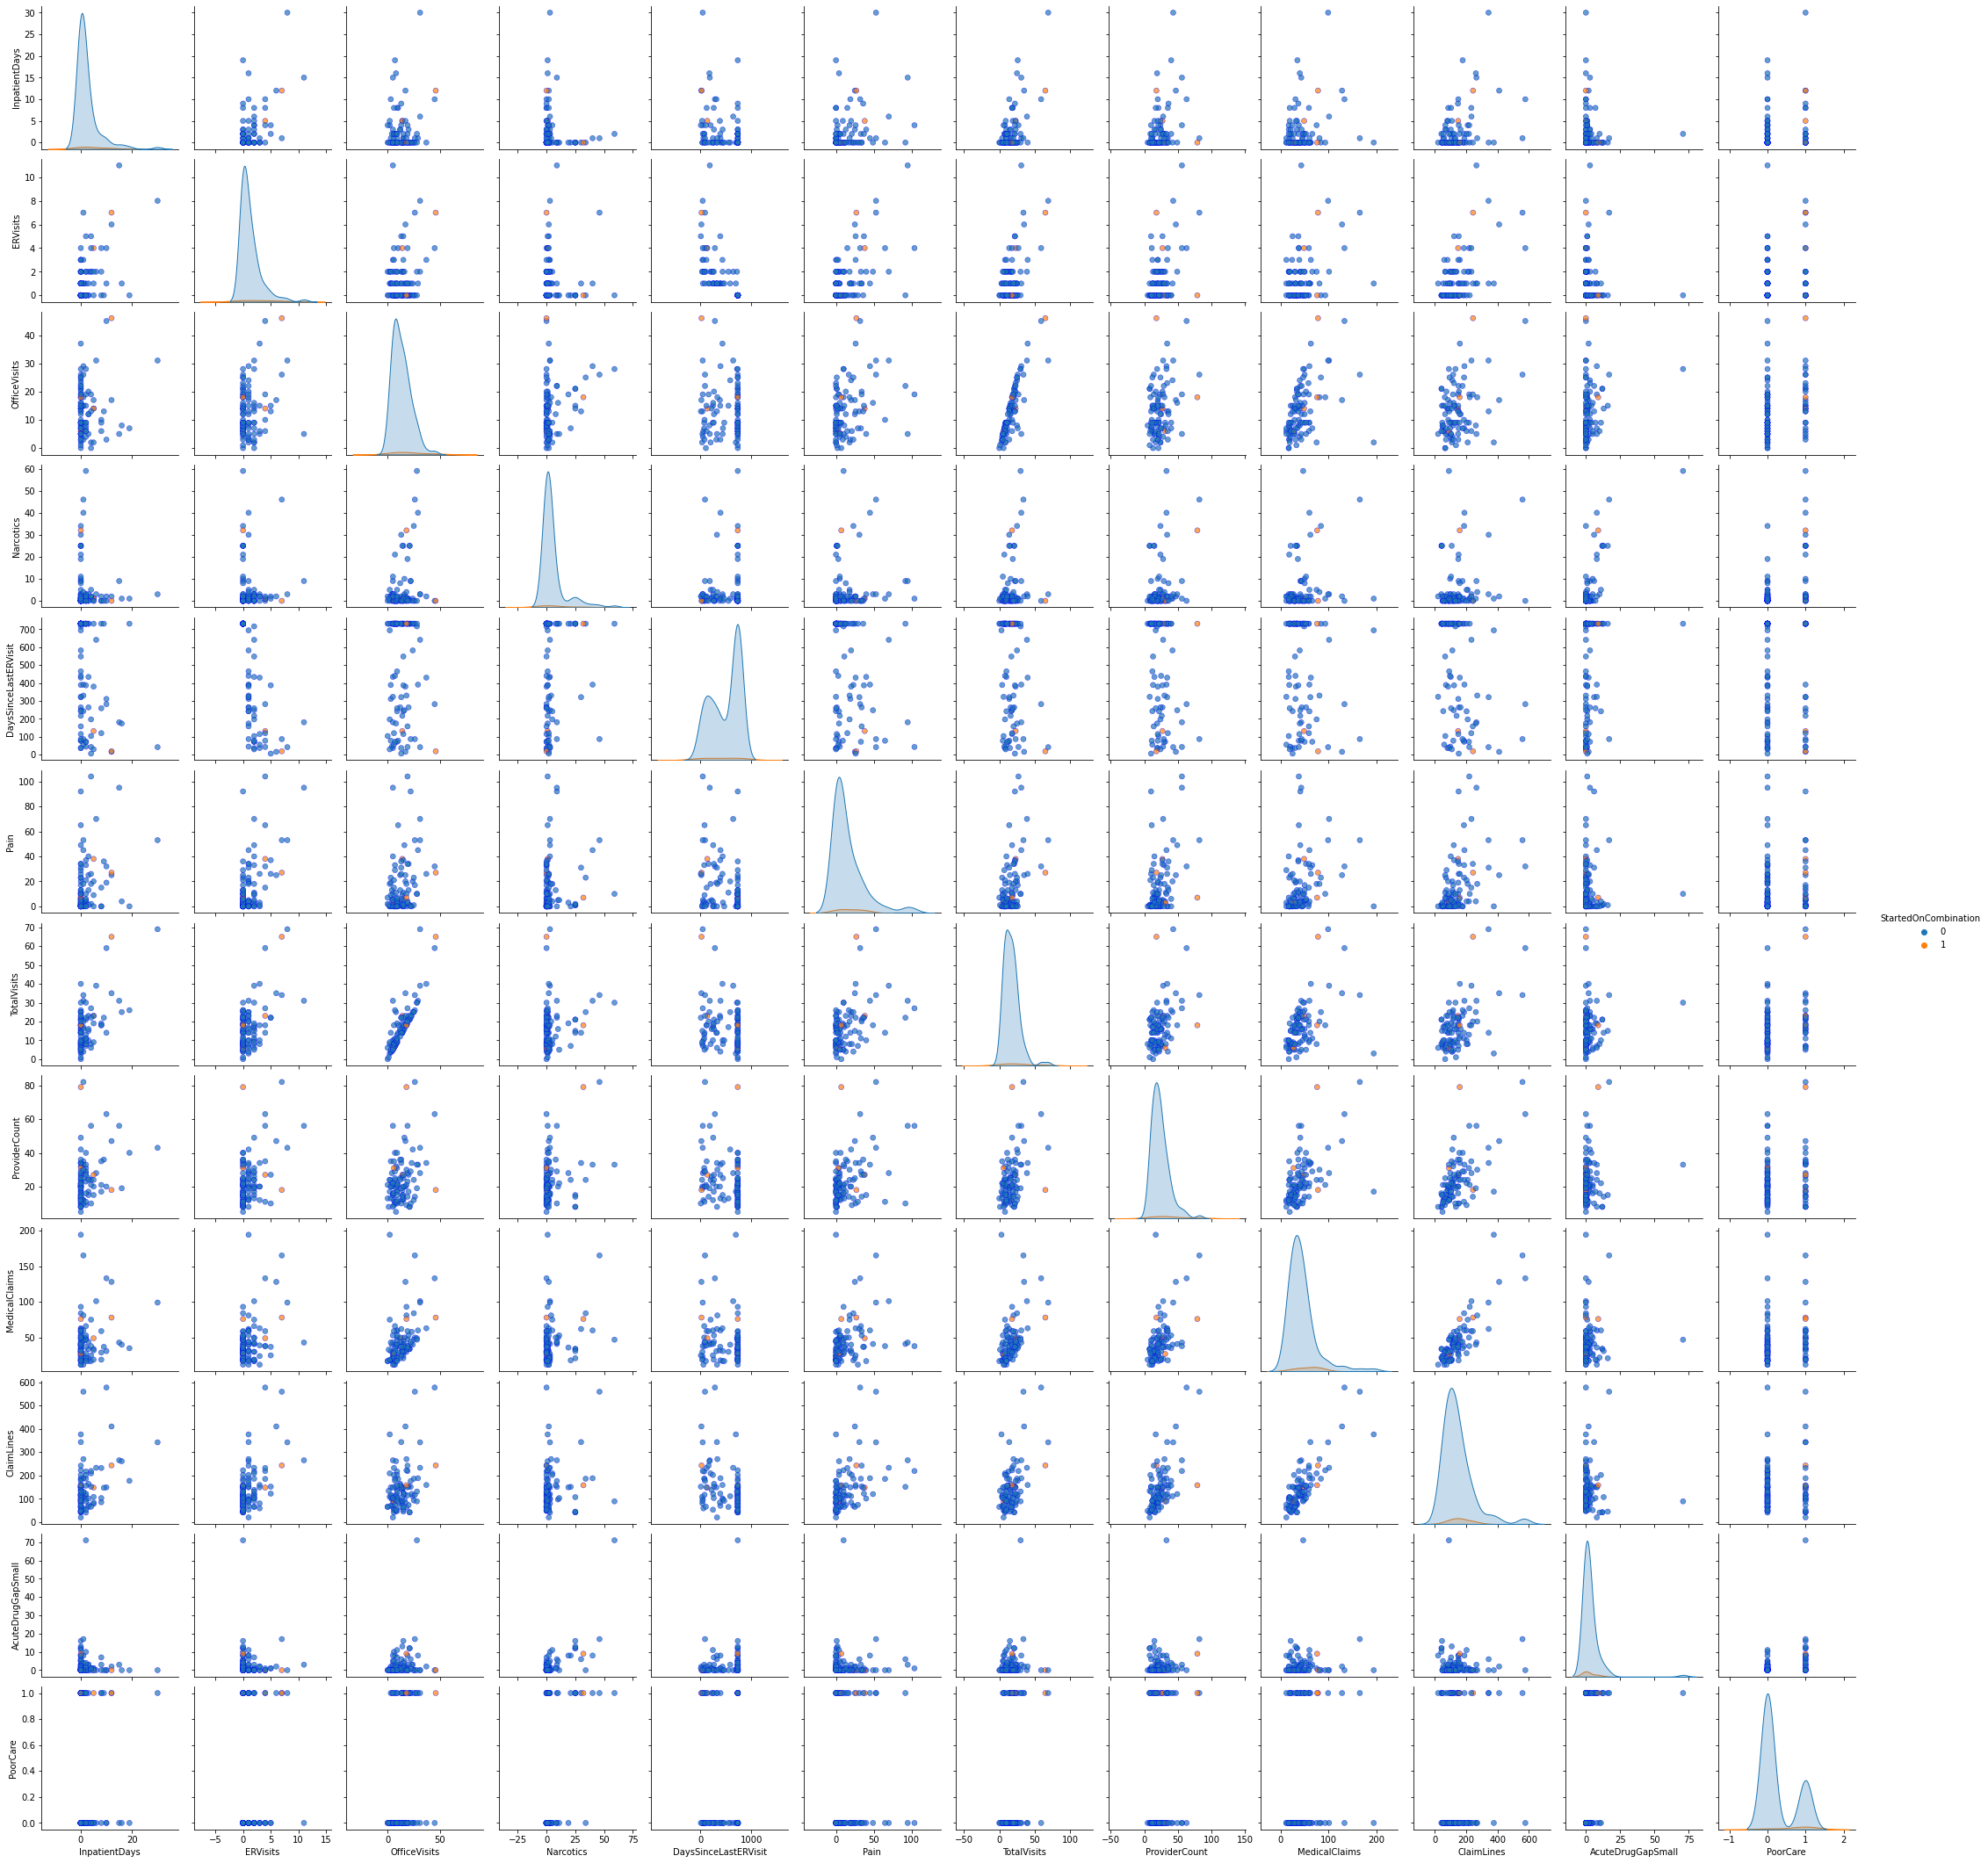

In [14]:
## construct pairplots 

x = ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines',
       'AcuteDrugGapSmall', 'PoorCare','StartedOnCombination']

g = sns.pairplot(train[x], plot_kws={'alpha': 0.7, 'edgecolor': 'blue'}, hue = 'StartedOnCombination')
fig = g.fig;

**Corelation heatmap**

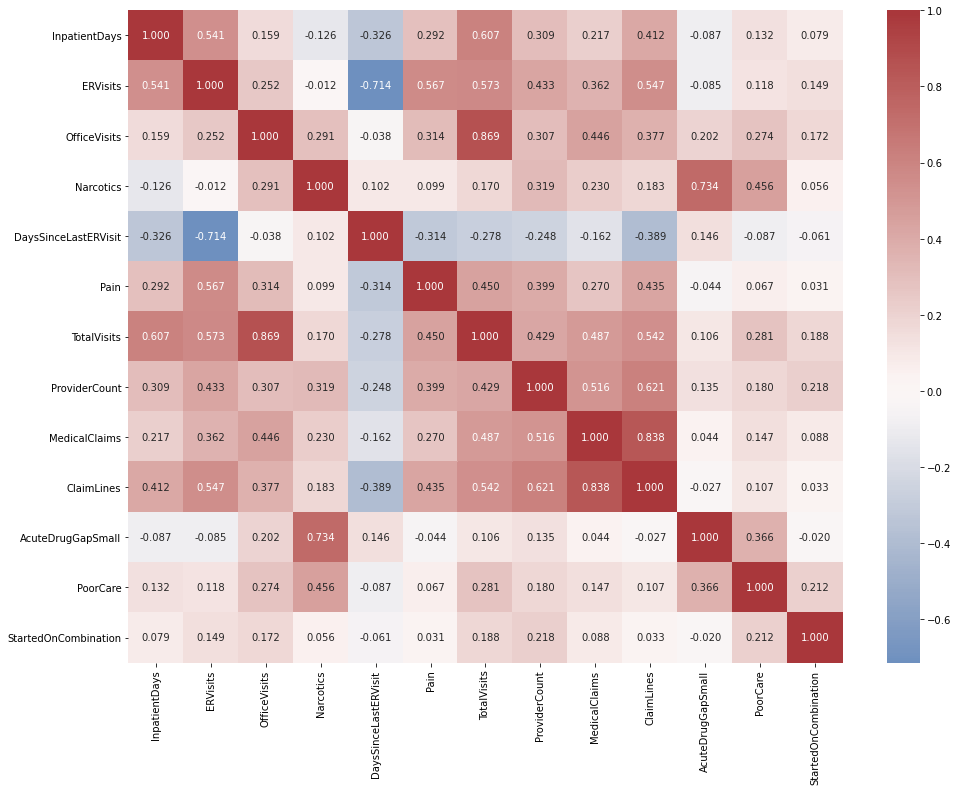

In [15]:
# correlation plot
plt.figure(figsize = [16, 12])
sns.heatmap(train[x].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.show()

## `4.` Logistic regression model 
#### We want to predict 0 or 1 (True or False)

`4.a` Logistic regression model with one parameter

In [16]:
# apply logistic regression model 
train['intercept'] = 1
logm = sm.Logit(train['PoorCare'],train[['intercept','OfficeVisits', 'Narcotics']])
result = logm.fit()

Optimization terminated successfully.
         Current function value: 0.482207
         Iterations 6


C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [17]:
# read the results summary 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PoorCare   No. Observations:                   98
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.1940
Time:                        13:50:04   Log-Likelihood:                -47.256
converged:                       True   LL-Null:                       -58.630
Covariance Type:            nonrobust   LLR p-value:                 1.149e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -2.0981      0.477     -4.403      0.000      -3.032      -1.164
OfficeVisits     0.0438      0.026      1.662      0.096      -0.008       0.096
Narcotics        0.1032      0.033      3.135      0.002       0.039       0.168
================================================================================
"""

`Interpret the results`

If the coeffient value of a variable is **positive**, means the variable **helps the model make the outcome of 1 more likely**.

If the coeffient value of a variable is **negative**, means the variable **helps the model make the outcome of 0 more likely**.


`4.b` Check the outcome of the model

In [18]:
predict_train = result.predict(train[['intercept','OfficeVisits', 'Narcotics']])

In [19]:
print(predict_train.mean())
print(train.PoorCare.mean())

0.2857142857142858
0.2857142857142857


In [53]:
predict_train.sum()

28.000000000000004

In [54]:
train.PoorCare.sum()

28

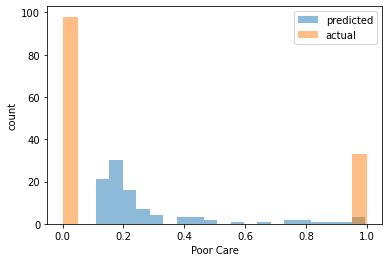

In [21]:
hamada_hist = dict(histtype='stepfilled', alpha=0.5,  bins=20)
plt.hist(predict_train, **hamada_hist);# the stars mean take the ling specified by what is after
plt.hist(quality.PoorCare, **hamada_hist);
names = ['predicted', 'actual']
plt.xlabel('Poor Care')
plt.ylabel('count')
plt.legend(names) # alwys better to save the legend names in a list and add the name of the list
plt.show()


#### `4.c` **Logistic regression threshold value**

A model with a **higher threshold** will have a **lower sensitivity
and a higher specificity**.

A model with a **lower threshold** will have a **higher sensitivity
and a lower specificity**.

In [61]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs])
scores = score_model(predict_train, 0.255)

In [62]:
scores.sum()

28

#### `4.d` confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
y_true = np.array(train.PoorCare)
y_predict = scores
confusion = confusion_matrix(y_true,y_predict)
print(confusion)

[[44 26]
 [ 7 21]]


A more better way of showing the confusion matrix as discribed by IBM Data Science Professional Track is as below

In [67]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])


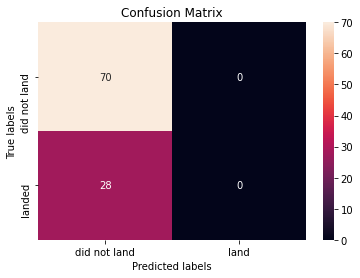

In [69]:
plot_confusion_matrix(y_true,y_predict)

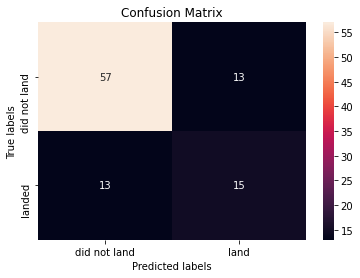

In [71]:
#taking into consideration the theshold of 0.255
plot_confusion_matrix(y_true,scores)

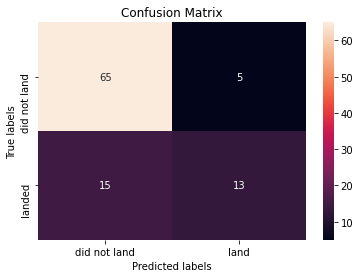

In [79]:
# check the impact of the threshold value on the model performance 
score1 = score_model(predict_train, 0.4)
plot_confusion_matrix(y_true,score1)



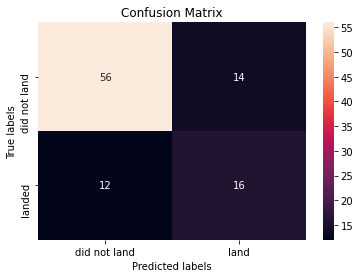

In [78]:
score2 = score_model(predict_train, 0.25)
plot_confusion_matrix(y_true,score2)


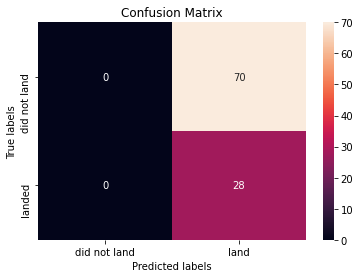

In [77]:
score3 = score_model(predict_train, 0.1)
plot_confusion_matrix(y_true,score3)

#### `4.e` Sensetivity and Specifity

A model with a **higher threshold** will have a **lower sensitivity
and a higher specificity**.

A model with a lower threshold will have a higher sensitivity
and a lower specificity.

In [28]:
## define the cinfusion matrix parameters 
tn = confusion[0,0]
tp = confusion[1,1]
fp = confusion[0,1]
fn = confusion[1,0]
sensitivity = tp/(tp+fn)
specifity = tn/(tn+fp)
print('sensitivity :', sensitivity)
print('specifity :', specifity)

sensitivity : 0.75
specifity : 0.6285714285714286


We changed the threshold value from 0.5 to 0.211 to get the sensetivity and the specifity close to each other 

**`4.f`** **`ROC - Receiver Operator Characteristic Cureve`** helps in deciding the threshold value 

In [29]:
## create a loop that costruct a dataframe with threshold and sensetivity and 1-sepcifity 
column_names = ('threshold', 'sensitivity', '1-specifity')
df_roc = pd.DataFrame(columns = column_names)
for i in (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1):
    scores=score_model(predict_train, i)
    y_true = np.array(train.PoorCare)
    y_predict = scores
    confusion = confusion_matrix(y_true,y_predict)
    tn = confusion[0,0]
    tp = confusion[1,1]
    fp = confusion[0,1]
    fn = confusion[1,0]
    sensetivity = tp/(tp+fn)
    specifity = tn/(tn+fp)
    df_roc = df_roc.append({'threshold': i, 'sensitivity':sensetivity, 
                 '1-specifity':1-specifity }, ignore_index=True)


In [30]:
df_roc.head(11)

,threshold,sensitivity,1-specifity
0,0.0,1.000000,1.000000
1,0.1,1.000000,1.000000
2,0.2,0.750000,0.371429
3,0.3,0.500000,0.114286
4,0.4,0.464286,0.071429
5,0.5,0.357143,0.028571
6,0.6,0.321429,0.028571
7,0.7,0.321429,0.014286
8,0.8,0.250000,0.014286
9,0.9,0.107143,0.014286


Text(0.5, 1.0, 'ROC - Receiver Operator Characteristic Curve')

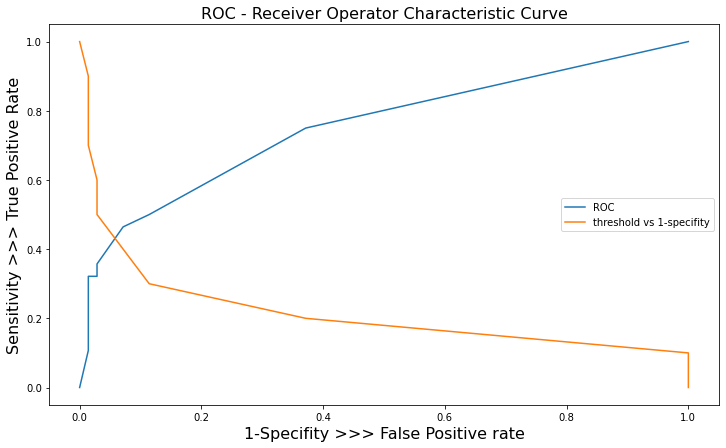

In [47]:
# plot the ROC cureve with threshold value
plt.figure(figsize = (12,7))
plt.plot(df_roc['1-specifity'],df_roc.sensitivity)
plt.plot(df_roc['1-specifity'],df_roc.threshold)
plt.xlabel('1-Specifity >>> False Positive rate' , fontsize = 16)
plt.ylabel('Sensitivity >>> True Positive Rate', fontsize = 16)
leg = ['ROC', 'threshold vs 1-specifity']
plt.legend(leg)
plt.title('ROC - Receiver Operator Characteristic Curve', fontsize = 16)

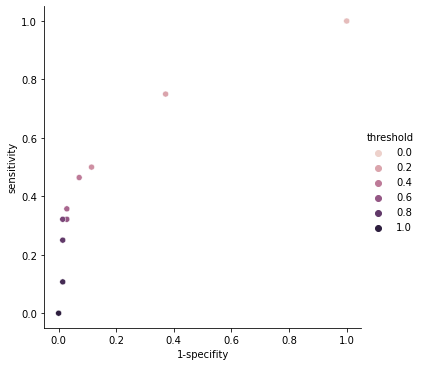

In [32]:
sns.relplot(data=df_roc,x='1-specifity', hue = 'threshold',y='sensitivity');

In [33]:
# calculate the AUC 'Area Under the Curve'
from sklearn import  metrics
# metrics.roc_auc_score(true_y, predicted_scores)
metrics.roc_auc_score(y_true,y_predict)

0.5

#### Plotting ROC from Sklearn 

In [35]:
from sklearn import  metrics
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(random_state=0).fit(train[['OfficeVisits', 'Narcotics']], train['PoorCare'])

In [40]:
clf.score(train[['OfficeVisits', 'Narcotics']], train['PoorCare'])

0.7959183673469388

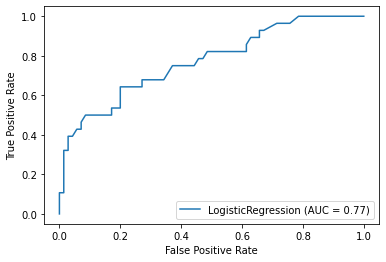

In [48]:
metrics.plot_roc_curve(clf, train[['OfficeVisits', 'Narcotics']], train['PoorCare']) 